The following section was an intial attempt to bring in the annual percent change in gdp for each country, as well as both net migration and population.  Net migration and population are used to calculate net migration per capita (net migration/population).

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Resources/gdp_percent_change_migration.csv'
data = pd.read_csv(file_path)
data.head()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,Net migration,SM.POP.NETM,2606,6109,7016,6681,7079,10695,...,233913,-286314,-143049,-71491,-36753,9159,143634,-548784,-647402,-48958
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043,9214083,9404406,9604487,9814318,10036008,...,32792523,33831764,34700612,35688935,36743039,37856121,39068979,40000412,40578842,41454761
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,..,..,..,..,..,...,2.72454336219565,1.45131466066431,2.26031420279821,2.6470032027451,1.18922812944517,3.91160341625552,-2.35110067203466,-20.7388393676343,-6.24017199240269,2.71088679128353
3,Albania,ALB,Net migration,SM.POP.NETM,13734,829,2325,4091,6604,9617,...,-21706,-20500,-9347,-14901,-15032,-23094,-16680,-32848,-16426,-25357
4,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,...,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666,2777689,2745972


Assessing and cleaning the dataset.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   800 non-null    object
 1   Country Code   798 non-null    object
 2   Series Name    798 non-null    object
 3   Series Code    798 non-null    object
 4   1960 [YR1960]  798 non-null    object
 5   1961 [YR1961]  798 non-null    object
 6   1962 [YR1962]  798 non-null    object
 7   1963 [YR1963]  798 non-null    object
 8   1964 [YR1964]  798 non-null    object
 9   1965 [YR1965]  798 non-null    object
 10  1966 [YR1966]  798 non-null    object
 11  1967 [YR1967]  798 non-null    object
 12  1968 [YR1968]  798 non-null    object
 13  1969 [YR1969]  798 non-null    object
 14  1970 [YR1970]  798 non-null    object
 15  1971 [YR1971]  798 non-null    object
 16  1972 [YR1972]  798 non-null    object
 17  1973 [YR1973]  798 non-null    object
 18  1974 [YR1974]  798 non-null   

In [3]:
# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Clean and reshape the dataset
def reshape_data(df, value_name):
    df_long = df.melt(
        id_vars=["Country Code", "Country Name"],  # Updated id_vars
        var_name="Year",
        value_name=value_name
    )
    # Extract year from column names and drop rows with invalid years
    df_long["Year"] = df_long["Year"].str.extract(r"(\d{4})")
    df_long = df_long.dropna(subset=["Year"])
    df_long["Year"] = df_long["Year"].astype(int)
    return df_long

# Filter data for relevant Series Codes
net_migration = data[data['Series Code'] == 'SM.POP.NETM']
population = data[data['Series Code'] == 'SP.POP.TOTL']
gdp_percent_change = data[data['Series Code'] == 'NY.GDP.MKTP.KD.ZG']

# Reshape the data
net_migration_long = reshape_data(net_migration, "Net Migration")
population_long = reshape_data(population, "Population")
gdp_change_long = reshape_data(gdp_percent_change, "GDP Percent Change")


Dataset merge and cleaning of new dataframe.

In [4]:
# Merge the datasets
merged_data = (
    net_migration_long
    .merge(population_long, on=["Country Code", "Country Name", "Year"], how="inner")
    .merge(gdp_change_long, on=["Country Code", "Country Name", "Year"], how="inner")
)

# Convert relevant columns to numeric
for col in ["Net Migration", "Population", "GDP Percent Change"]:
    merged_data[col] = pd.to_numeric(merged_data[col], errors="coerce")

# Calculate Net Migration per Capita
merged_data["Net Migration per Capita"] = merged_data["Net Migration"] / merged_data["Population"]

# Drop rows with missing or invalid values
clean_data = merged_data.dropna(subset=["Net Migration per Capita", "GDP Percent Change"])

# Filter out regions using Country Code (retain only ISO country codes)
# Assuming regions have non-standard codes (e.g., 3 letters like 'EAS', 'SSA')
iso_country_codes = clean_data[clean_data['Country Code'].str.match(r'^[A-Z]{3}$')]



Plot the xy scatter plot for each country.

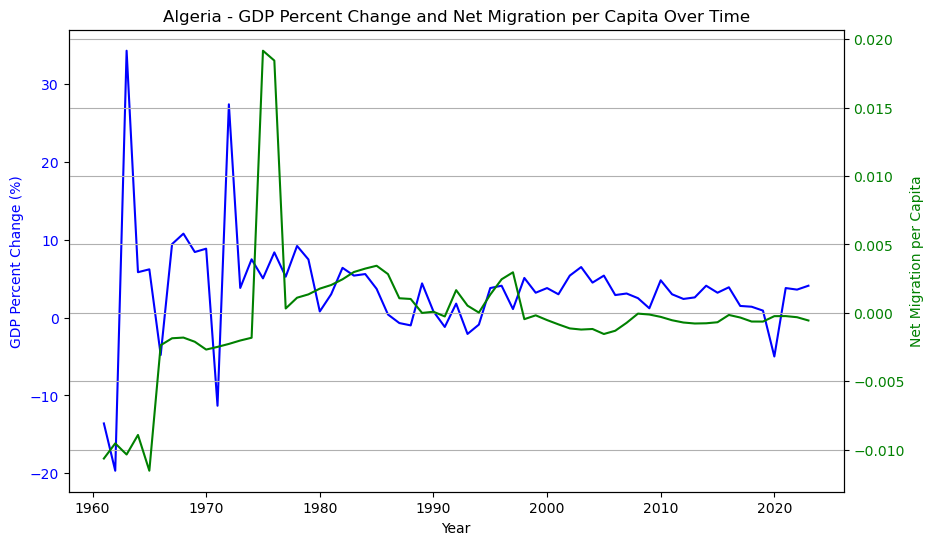

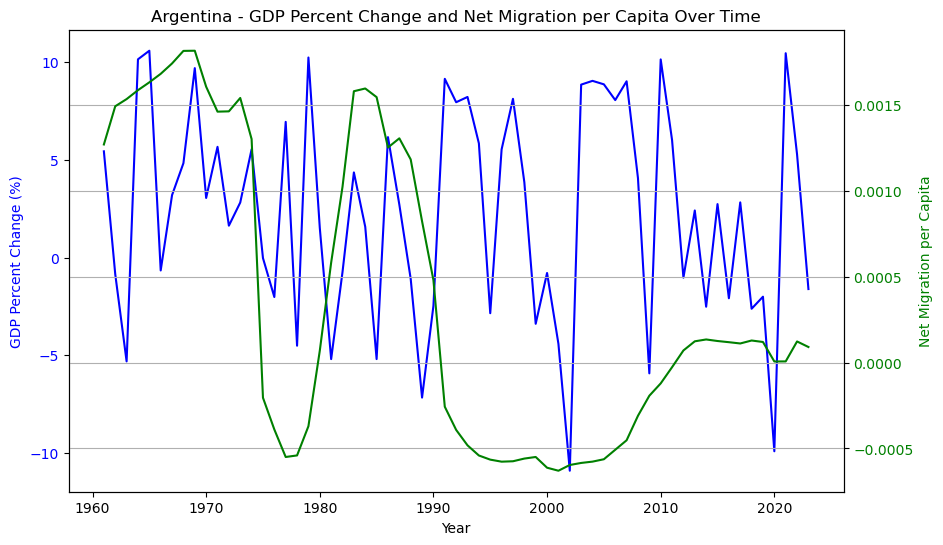

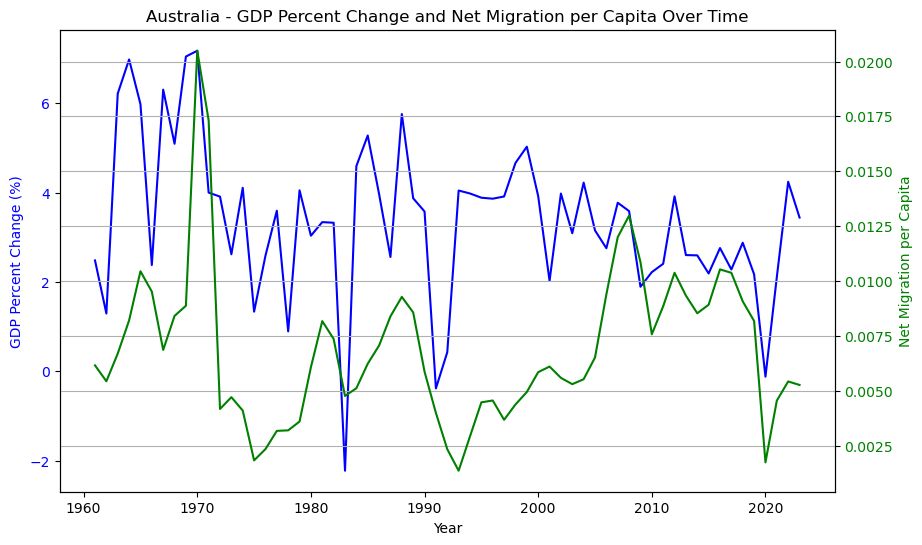

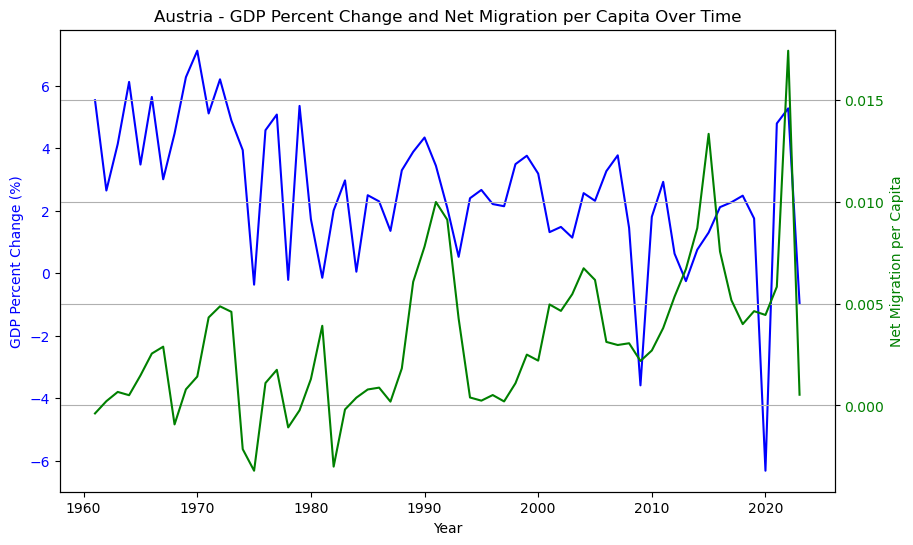

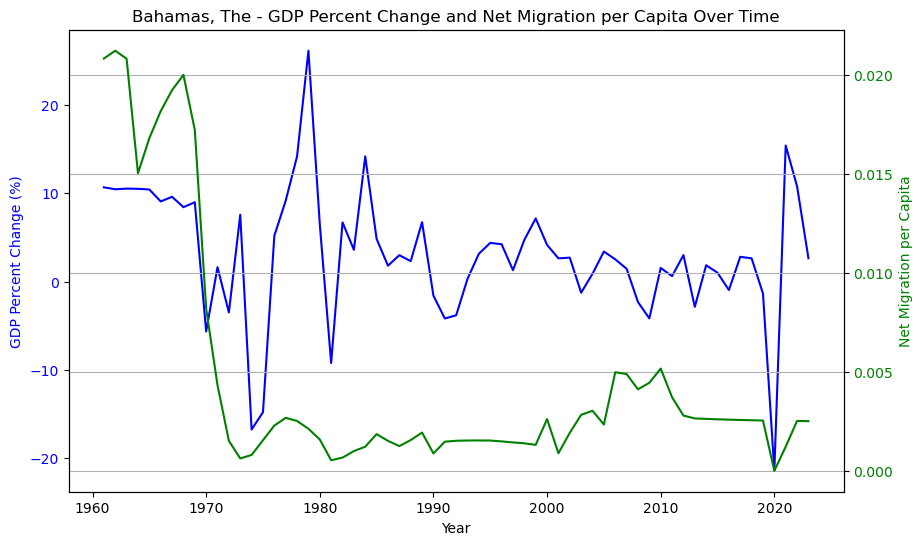

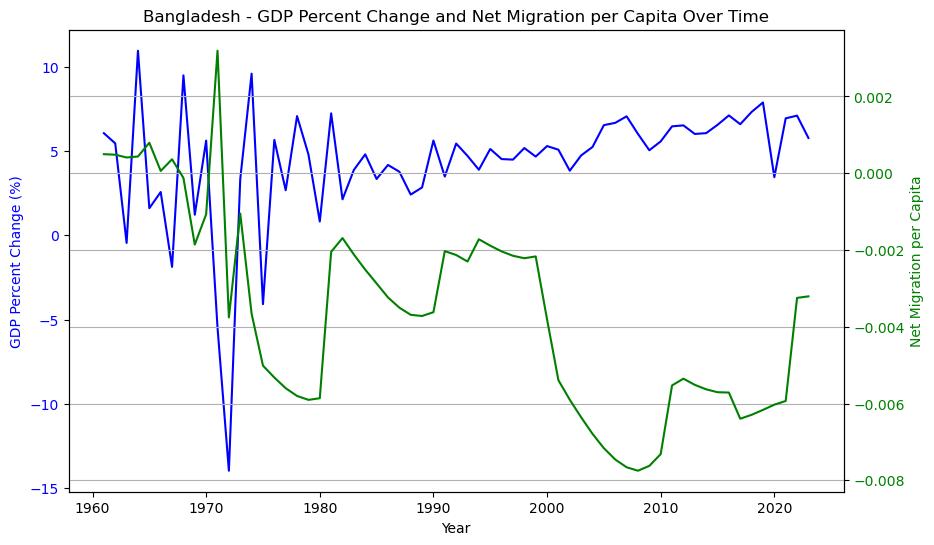

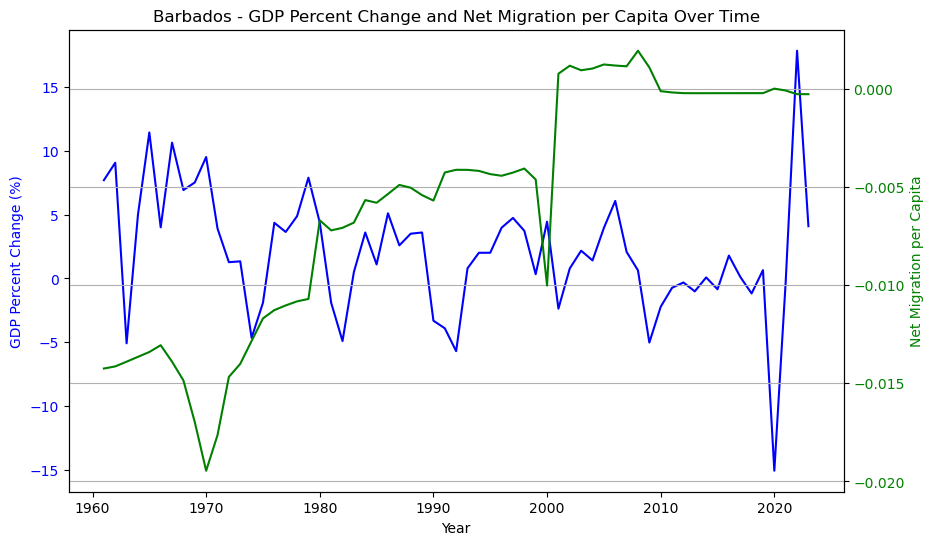

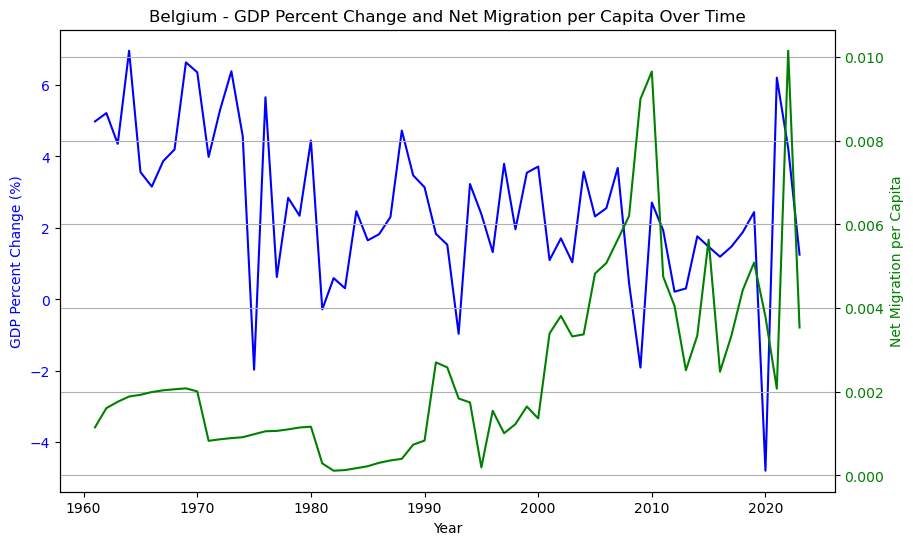

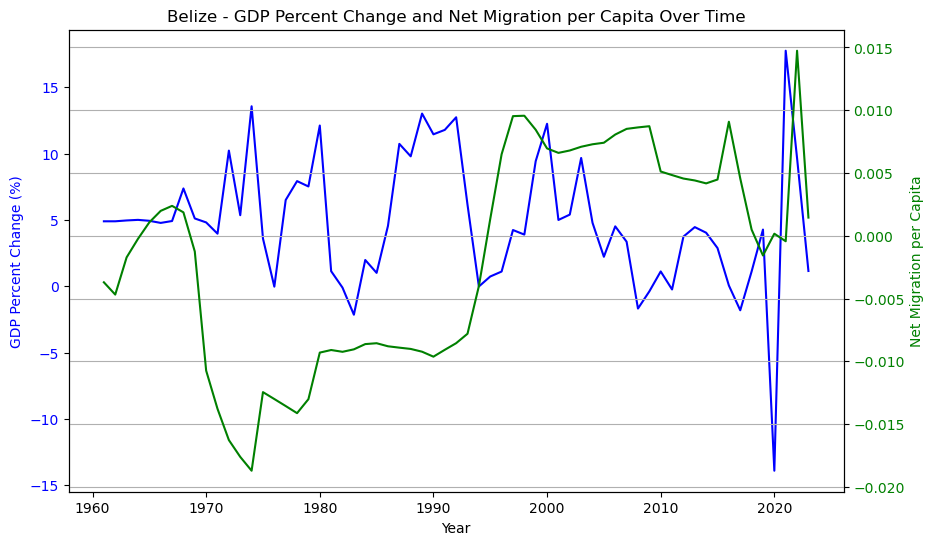

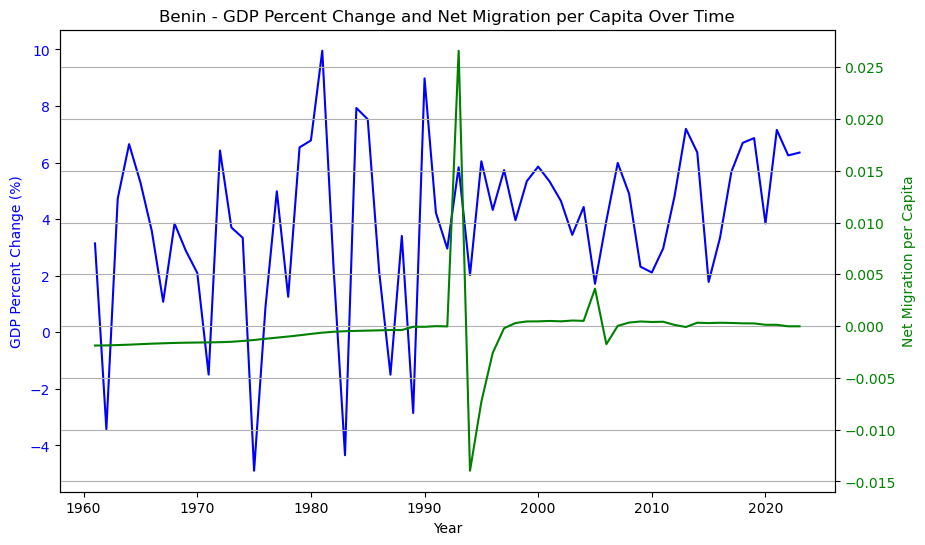

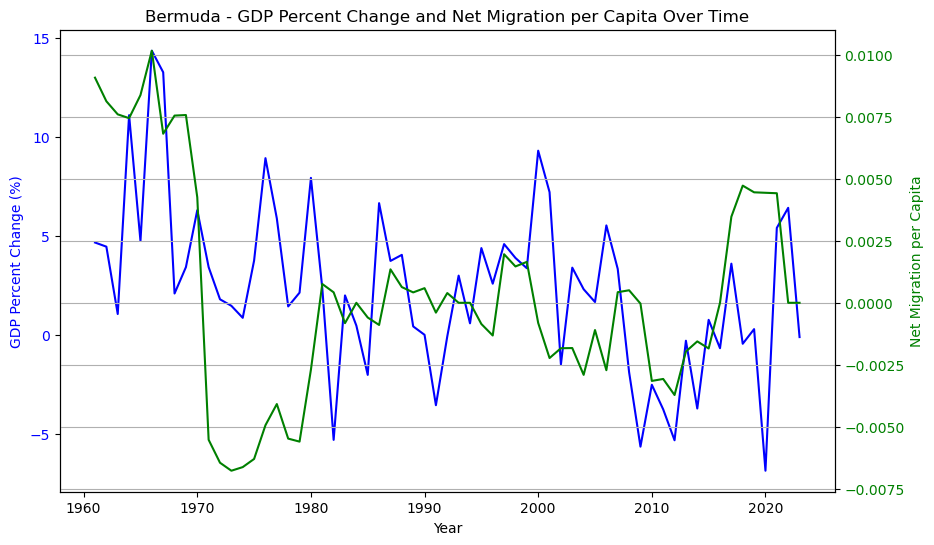

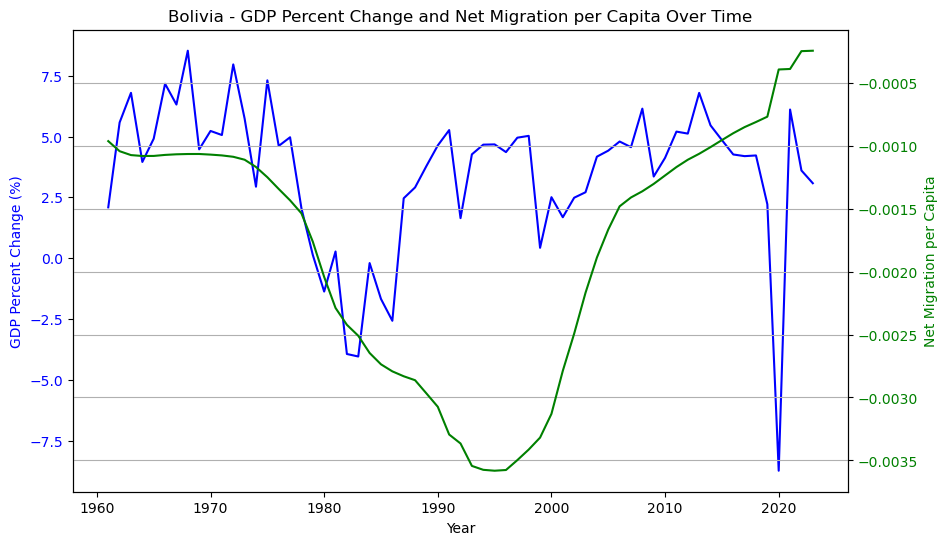

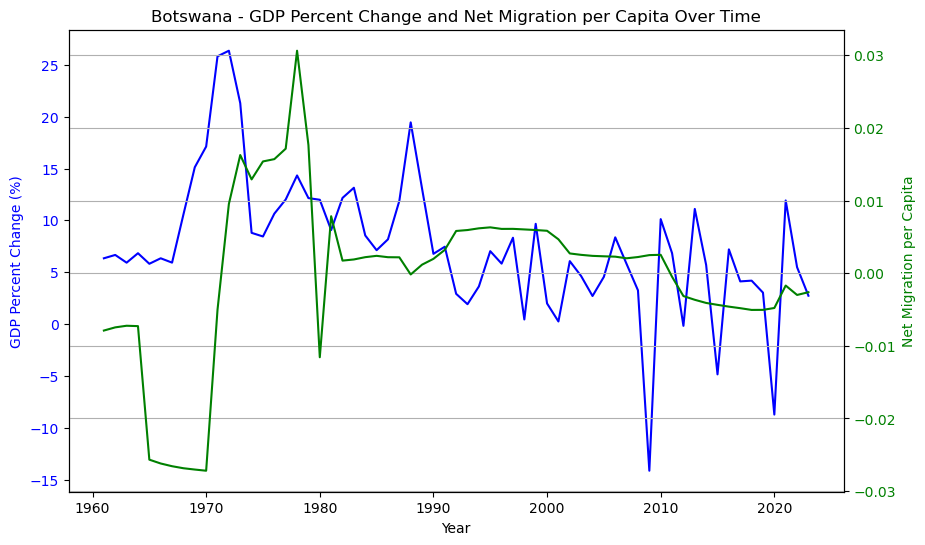

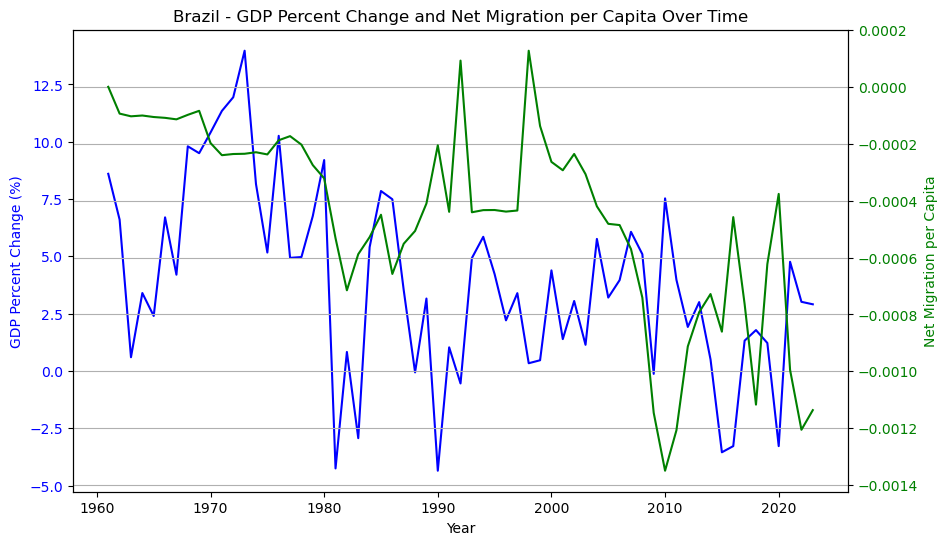

KeyboardInterrupt: 

In [5]:
# Generate dual-axis time-series plots for each country
unique_countries = iso_country_codes["Country Name"].unique()

for country in unique_countries:
    country_data = iso_country_codes[iso_country_codes["Country Name"] == country]
    
    # Create the dual-axis plot
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot GDP Percent Change
    ax1.set_xlabel("Year")
    ax1.set_ylabel("GDP Percent Change (%)", color="blue")
    ax1.plot(country_data["Year"], country_data["GDP Percent Change"], label="GDP Percent Change", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    # Create second y-axis for Net Migration per Capita
    ax2 = ax1.twinx()
    ax2.set_ylabel("Net Migration per Capita", color="green")
    ax2.plot(country_data["Year"], country_data["Net Migration per Capita"], label="Net Migration per Capita", color="green")
    ax2.tick_params(axis="y", labelcolor="green")

    # Add title and grid
    plt.title(f"{country} - GDP Percent Change and Net Migration per Capita Over Time")
    plt.grid(True)

    # Show the plot
    plt.show()


The above code is functional but the output demonstrated that the dataframe includes data for regions and not specific countries.  Code below consolidates the code above and includes generating a list of countries to create a new dataframe with only country data. 

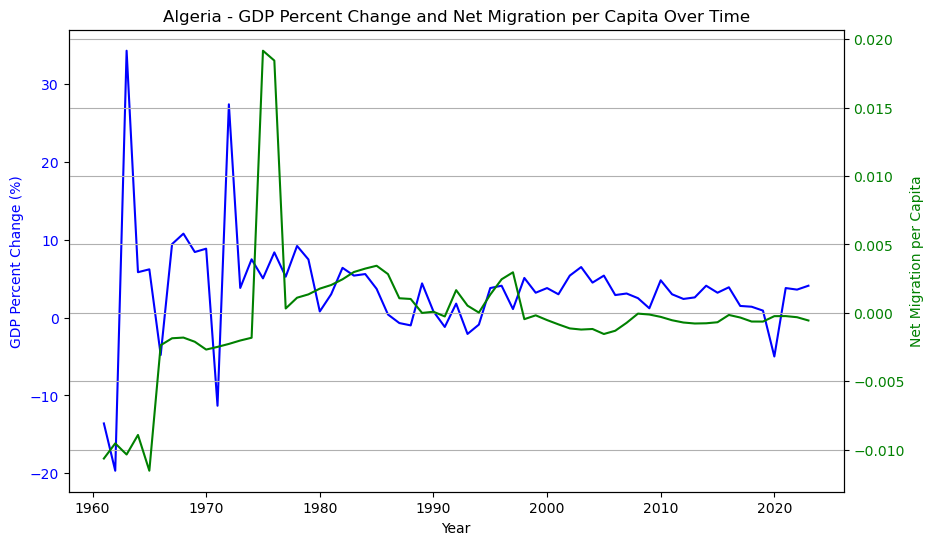

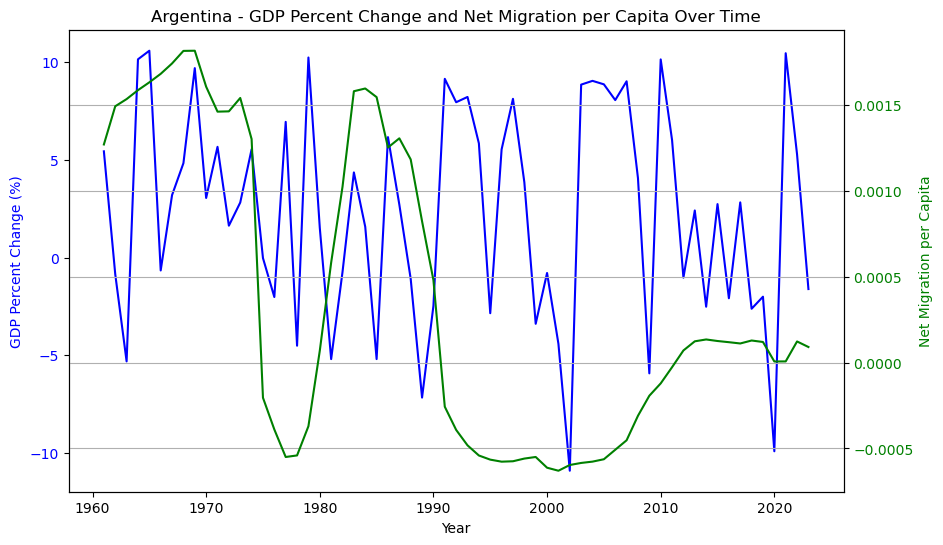

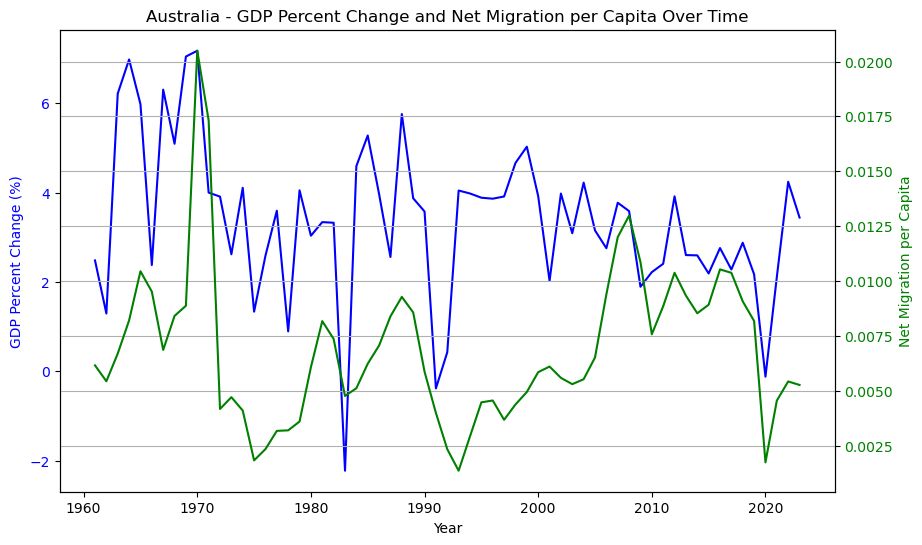

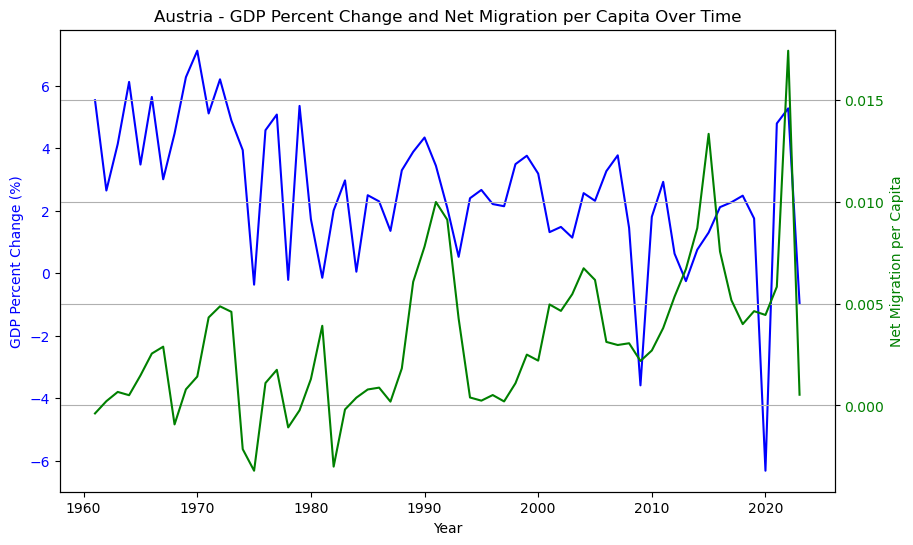

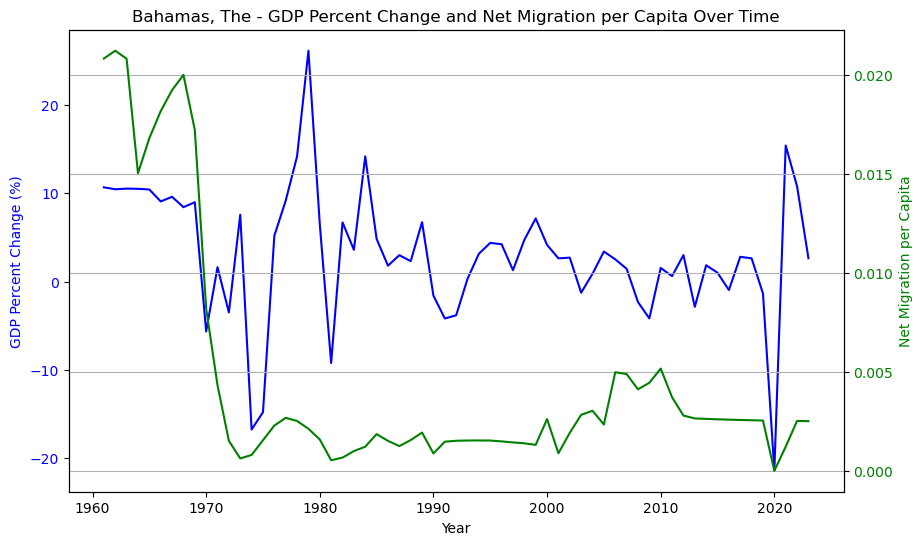

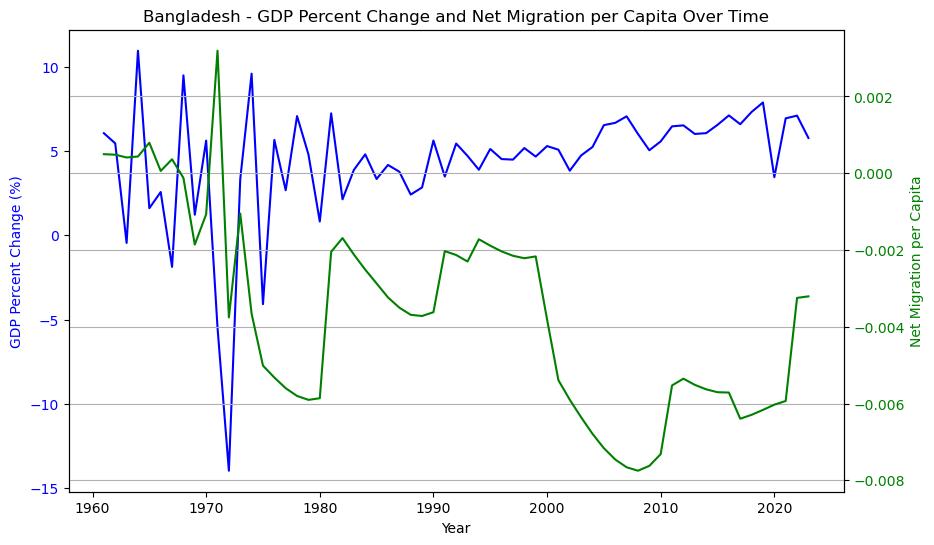

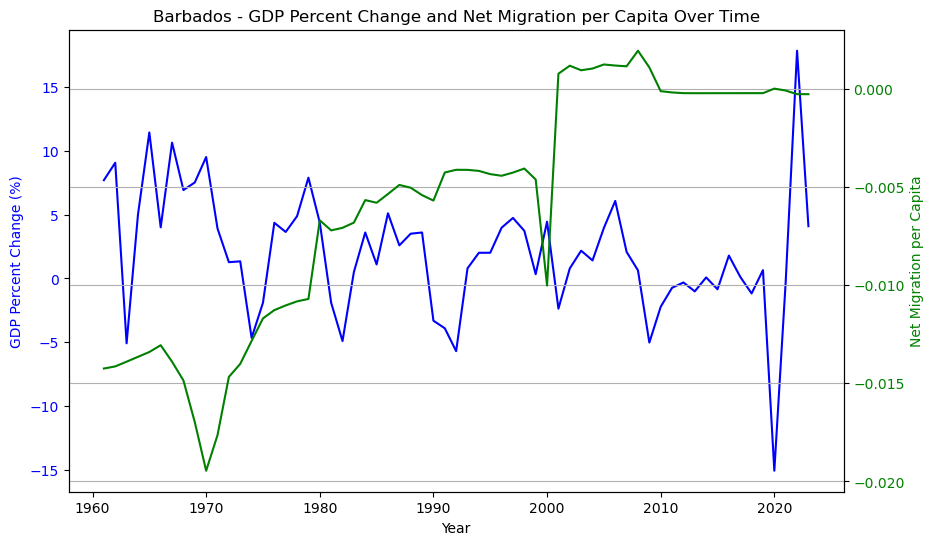

KeyboardInterrupt: 

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Resources/gdp_percent_change_migration.csv'
data = pd.read_csv(file_path)

# Strip whitespace from column names
data.columns = data.columns.str.strip()

# List of ISO country codes (example subset; replace with a full list)
iso_country_codes_list = [
    'AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 
    'BLR', 'BEL', 'BLZ', 'BEN', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 
    'KHM', 'CMR', 'CAN', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COD', 'CRI', 'CIV', 'HRV', 
    'CUB', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 
    'ETH', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GIN', 'GNB', 
    'GUY', 'HTI', 'HND', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 
    'JOR', 'KAZ', 'KEN', 'KIR', 'PRK', 'KOR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 
    'LIE', 'LTU', 'LUX', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 
    'MDA', 'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'NZL', 'NIC', 'NER', 
    'NGA', 'NOR', 'OMN', 'PAK', 'PLW', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'QAT', 'ROU', 
    'RUS', 'RWA', 'KNA', 'LCA', 'VCT', 'WSM', 'SMR', 'STP', 'SAU', 'SEN', 'SRB', 'SYC', 'SLE', 'SGP', 
    'SVK', 'SVN', 'SLB', 'SOM', 'ZAF', 'SSD', 'ESP', 'LKA', 'SDN', 'SUR', 'SWE', 'CHE', 'SYR', 'TWN', 
    'TJK', 'TZA', 'THA', 'TLS', 'TGO', 'TON', 'TTO', 'TUN', 'TUR', 'TKM', 'TUV', 'UGA', 'UKR', 'ARE', 
    'GBR', 'USA', 'URY', 'UZB', 'VUT', 'VEN', 'VNM', 'YEM', 'ZMB', 'ZWE'
]

# Filter for actual countries
data = data[data['Country Code'].isin(iso_country_codes_list)]

# Clean and reshape the dataset
def reshape_data(df, value_name):
    df_long = df.melt(
        id_vars=["Country Code", "Country Name"],  # Updated id_vars
        var_name="Year",
        value_name=value_name
    )
    # Extract year from column names and drop rows with invalid years
    df_long["Year"] = df_long["Year"].str.extract(r"(\d{4})")
    df_long = df_long.dropna(subset=["Year"])
    df_long["Year"] = df_long["Year"].astype(int)
    return df_long

# Filter data for relevant Series Codes
net_migration = data[data['Series Code'] == 'SM.POP.NETM']
population = data[data['Series Code'] == 'SP.POP.TOTL']
gdp_percent_change = data[data['Series Code'] == 'NY.GDP.MKTP.KD.ZG']

# Reshape the data
net_migration_long = reshape_data(net_migration, "Net Migration")
population_long = reshape_data(population, "Population")
gdp_change_long = reshape_data(gdp_percent_change, "GDP Percent Change")

# Merge the datasets
merged_data = (
    net_migration_long
    .merge(population_long, on=["Country Code", "Country Name", "Year"], how="inner")
    .merge(gdp_change_long, on=["Country Code", "Country Name", "Year"], how="inner")
)

# Convert relevant columns to numeric
for col in ["Net Migration", "Population", "GDP Percent Change"]:
    merged_data[col] = pd.to_numeric(merged_data[col], errors="coerce")

# Calculate Net Migration per Capita
merged_data["Net Migration per Capita"] = merged_data["Net Migration"] / merged_data["Population"]

# Drop rows with missing or invalid values
clean_data = merged_data.dropna(subset=["Net Migration per Capita", "GDP Percent Change"])

# Generate dual-axis time-series plots for each country
unique_countries = clean_data["Country Name"].unique()

for country in unique_countries:
    country_data = clean_data[clean_data["Country Name"] == country]
    
    # Create the dual-axis plot
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot GDP Percent Change
    ax1.set_xlabel("Year")
    ax1.set_ylabel("GDP Percent Change (%)", color="blue")
    ax1.plot(country_data["Year"], country_data["GDP Percent Change"], label="GDP Percent Change", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    # Create second y-axis for Net Migration per Capita
    ax2 = ax1.twinx()
    ax2.set_ylabel("Net Migration per Capita", color="green")
    ax2.plot(country_data["Year"], country_data["Net Migration per Capita"], label="Net Migration per Capita", color="green")
    ax2.tick_params(axis="y", labelcolor="green")

    # Add title and grid
    plt.title(f"{country} - GDP Percent Change and Net Migration per Capita Over Time")
    plt.grid(True)

    # Show the plot
    plt.show()


In order to focus on the most impactful results, screening the results for the highest signficance as measured by r value.  

In [7]:
from scipy.stats import pearsonr
import pandas as pd

# Initialize an empty list to store results
results = []

# Iterate over each country in the dataset
for country in clean_data["Country Name"].unique():
    # Filter data for the current country
    country_data = clean_data[clean_data["Country Name"] == country]
    
    # Ensure there is enough data for correlation calculation
    if len(country_data) > 1:  # Pearson requires at least two data points
        # Calculate the Pearson correlation coefficient
        r, p_value = pearsonr(
            country_data["GDP Percent Change"],
            country_data["Net Migration per Capita"]
        )
        # Append results as a dictionary
        results.append({
            "Country Name": country,
            "Pearson r": r,
            "P-value": p_value
        })

# Create a DataFrame from the results
correlation_df = pd.DataFrame(results)

# Sort the DataFrame by the Pearson r column in descending order
sorted_correlation_df = correlation_df.sort_values(by="Pearson r", ascending=False)

# Display the top 5 rows
top_5 = sorted_correlation_df.head(5)
print(top_5)

               Country Name  Pearson r       P-value
79                   Rwanda   0.700110  1.707309e-10
169  Bosnia and Herzegovina   0.616810  1.319327e-04
173              Kazakhstan   0.610395  1.619180e-04
55                  Liberia   0.591653  3.282438e-07
181             Timor-Leste   0.575526  4.580859e-04


Create the xy scatter plots and include regression lines and r values for the 5 highest and lowest r values.

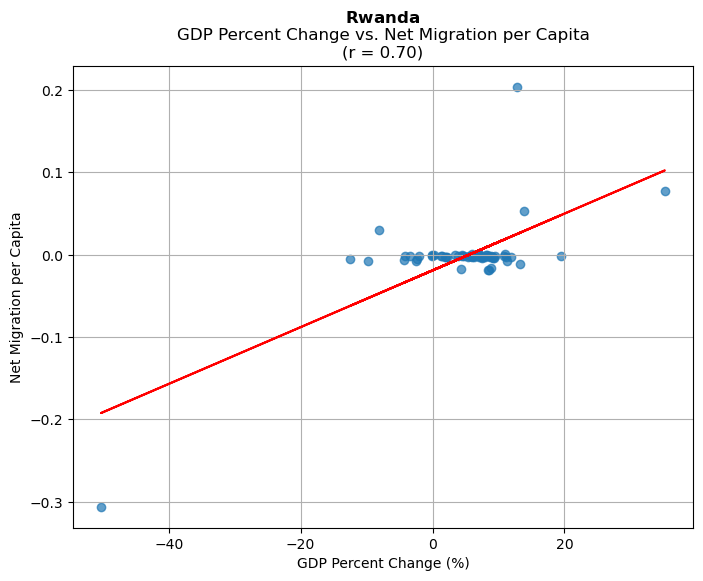

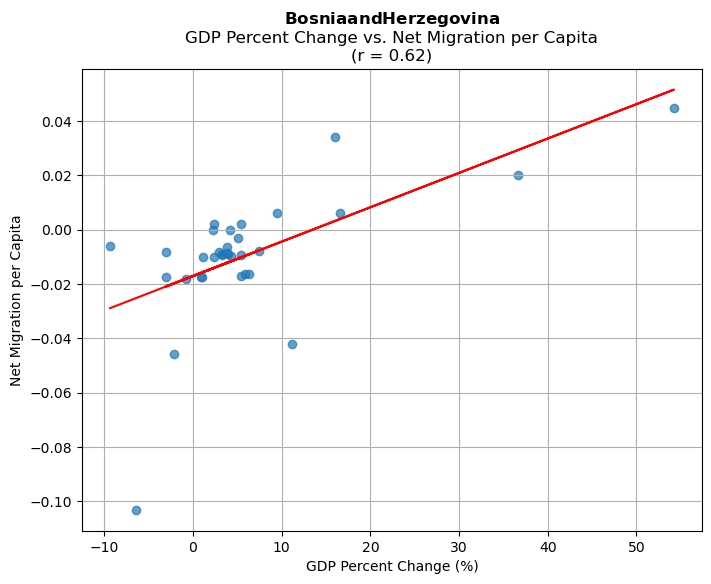

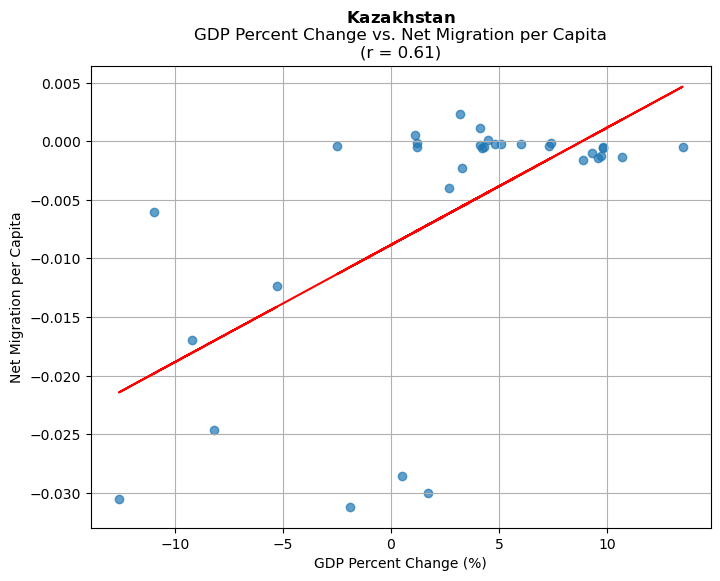

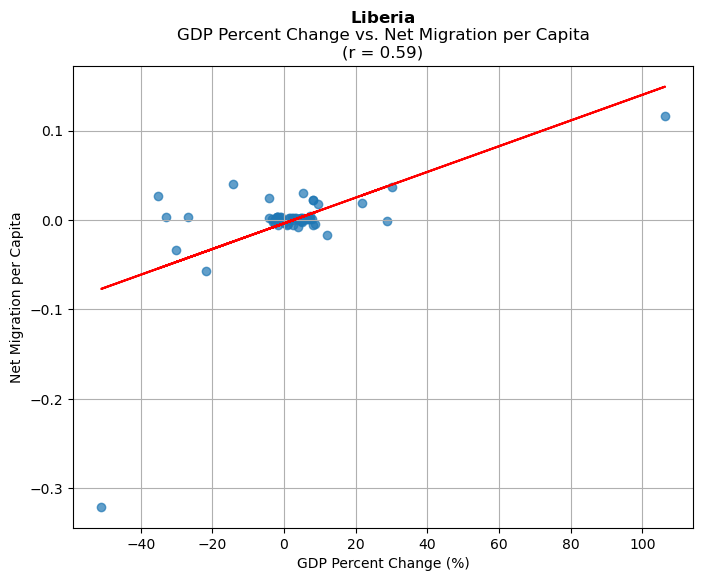

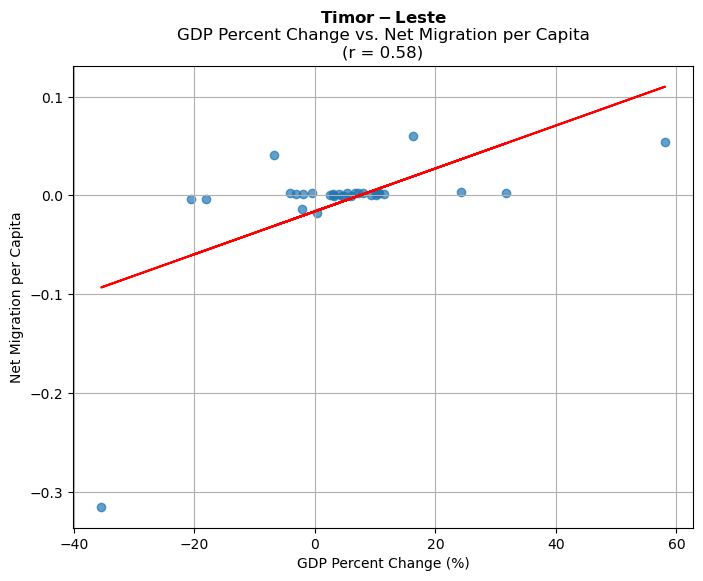

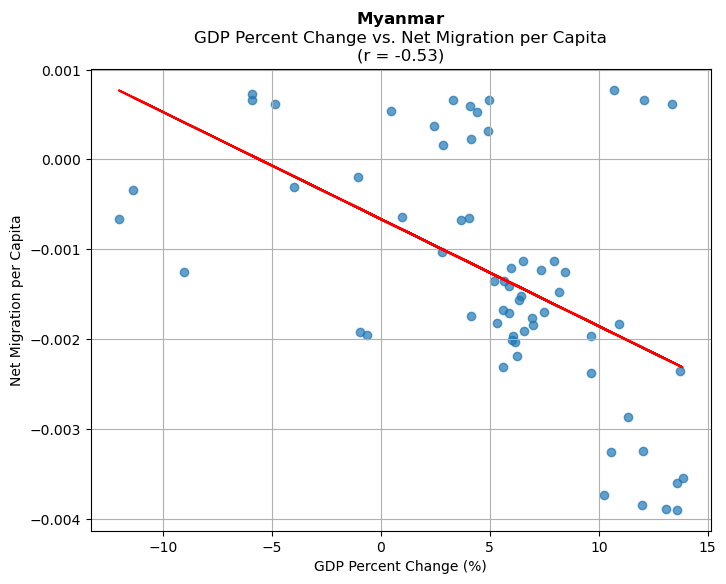

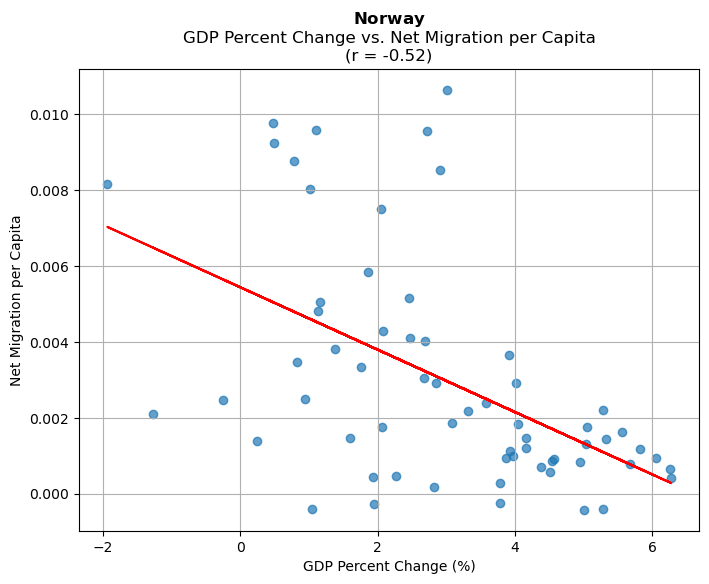

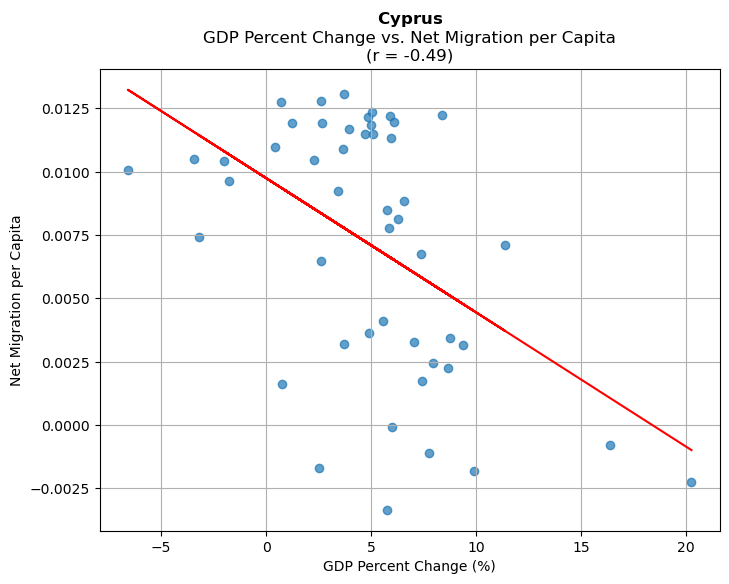

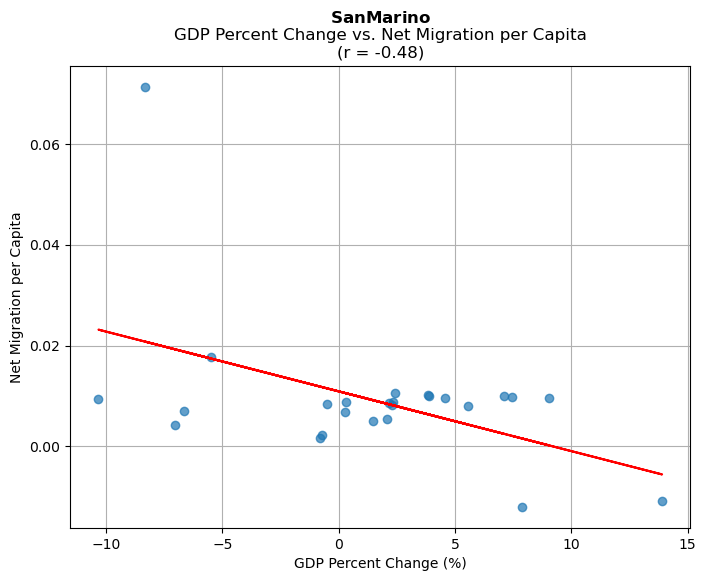

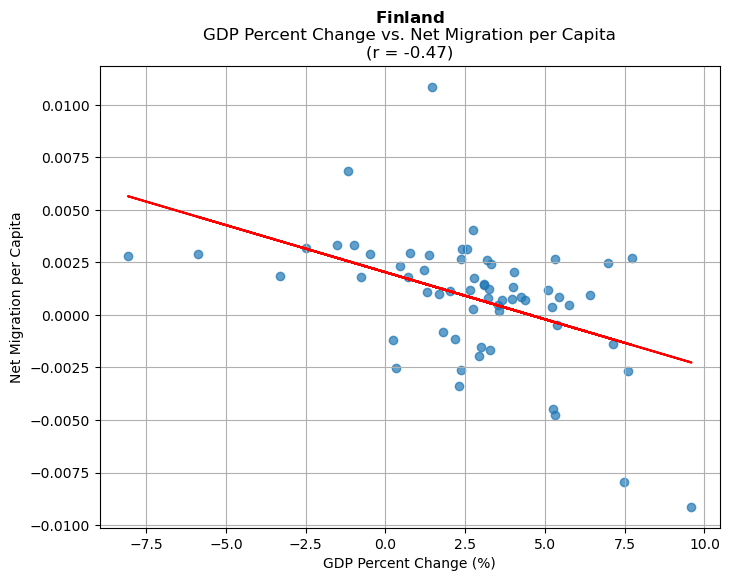

In [8]:
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt

# Sort the correlation DataFrame to get the top 5 and bottom 5 countries by Pearson r
top_5_countries = correlation_df.sort_values(by="Pearson r", ascending=False).head(5)["Country Name"]
bottom_5_countries = correlation_df.sort_values(by="Pearson r", ascending=True).head(5)["Country Name"]

# Combine the two sets of countries
selected_countries = pd.concat([top_5_countries, bottom_5_countries])

# Filter the clean_data DataFrame for only the selected countries
selected_data = clean_data[clean_data["Country Name"].isin(selected_countries)]

# Generate xy plots with regression lines for each of the selected countries
for country in selected_countries:
    country_data = selected_data[selected_data["Country Name"] == country]
    
    # Calculate Pearson correlation coefficient
    r, _ = pearsonr(
        country_data["GDP Percent Change"],
        country_data["Net Migration per Capita"]
    )
    
    # Fit a linear regression line
    x = country_data["GDP Percent Change"]
    y = country_data["Net Migration per Capita"]
    slope, intercept = np.polyfit(x, y, 1)
    regression_line = slope * x + intercept
    
    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.7)
    plt.plot(x, regression_line, color="red")
    
    # Add annotations and labels
    plt.title(f"$\\bf{{{country}}}$\nGDP Percent Change vs. Net Migration per Capita\n(r = {r:.2f})")
    plt.xlabel("GDP Percent Change (%)")
    plt.ylabel("Net Migration per Capita")
    plt.grid(True)
    
    # Show the plot
    plt.show()
